# 5. 워드 임베딩

## 5.1 벡터화
- 벡터화: 자연어 처리 전처리 과정에서 텍스트를 벡터로 변화시키는 과정.

- Bag of words -> DTM -> TF-IDF (원-핫 인코딩 사용)
- 워드 임베딩: 분산 표현을 이용해 단어의 유사도를 벡터화함

#### 디렉토리 생성

```$ mkdir -p ~/aiffel/word_embedding```

### Bag of words / DTM(Document-Term Matrix)
단어의 순서는 고려하지 않고 __단어의 등장 빈도__ 만을 고려해 단어를 벡터화 하는 방법

[[딥러닝 자연어처리] Bag of Words](https://www.youtube.com/watch?v=dKYFfUtij_U&t=2s)

>- Bag of Words    
>단어의 출현 빈도로 문장 표현을 통해 문장의 유사도(내적을 해서 구함)를 계산 가능.    
>  - 단점    
>    1. Sparsity: 무수히 많은 0이 나와서 계산량, 메모리 많이 사용
>    2. Frequent words has more power(예: the)
>    3. 단어 순서를 무시하므로 문맥도 무시됨
>    4. Out of Vocabulary: 단어 사전에 없는 새로운 단어에 대처할 수 없는 문제
    
#### DTM(문서 단어 행렬, Document-Term Matrix)
Bag of Words를 이용해 문서의 유사도를 비교하기 위한 행렬. 문서가 행(문서 벡터), 단어가 열(단어 벡터)로 구성되어 있다. 즉 두 문서에서 공통적으로 등장하는 단어가 많으면 두 문서가 유사하다고 판단한다. 

- 문서1 : you know I want your love
- 문서2 : I like you
- 문서3 : what should I do

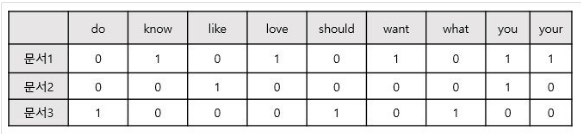

bag of words 방법을 사용할 때 불필요한 단어를 제거하거나 표현은 다르지만 같은 단어를 통합시켜주는 정규화 등과 같은 전처리를 한다. 불필요한 카운트는 미리 배제하는 것이 좋다. 여기서는 길이가 1인 단어를 제거하는 전처리를 했다. 

DTM의 열의 개수: 전체 텍스트에서 등장한 단어의 개수. 단어장의 크기(V)는 전체 텍스트에서 한 번이라도 등장한 중복을 제거한 단어의 개수. 위의 예에서 V=9. 

문서나 단어의 수가 많아질수록 행렬의 대부분의 값이 0이 되는 희소 문제는 심화된다. 

- DTM의 문제점: 중요하지 않은 단어인데도 모든 문서에서 공통적으로 등장하는 단어가 있으면 모든 문서의 유사도가 높다고 여겨진다.

!중요 개념!

- 희소 벡터(sparse vector): 대부분의 값이 0인 벡터
- 단어장(Vocabulary): 중복 카운트는 배제한 단어들의 집합, 단어집합, 사전. 

### TF-IDF
DTM의 문제점을 해결하기 위해 등장. DTM은 중요하지 않은 단어가 많이 나올 경우 유사도가 높다고 여긴다. 그러나 중요하지 않은 단어인데도 모든 문서에서 공통적으로 등장하는 단어(예: 불용어)가 있다면 어떻게 할까? 따라서 단어마다 중요 가중치를 다르게 주는 방법인 TF-IDF의 개념이 나왔다. 

[[딥러닝 자연어처리] TF-IDF](https://www.youtube.com/watch?v=meEchvkdB1U)

- TF-IDF: 문서가 주어졌을 때 단어별 문장의 연관성을 수치로 나타낸 값. 모든 문서에서 자주 들어간 단어에 패널티를 준다. 계산식은 아래와 같다. 

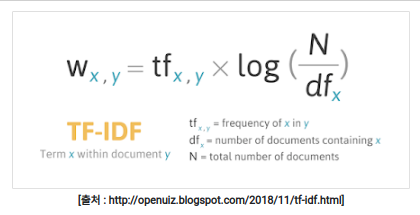

- TF-IDF과 DTM의 공통점    
1. 문서 백터의 크기가 단어장의 크기인 V
2. 문서 벡터와 단어 벡터 모두 희소 벡터

### 원-핫 인코딩(one-hot encoding)

모든 단어의 관계를 독립적으로 정의하는 방식. 

- 원-핫 인코딩의 방법
1. 텍스트 데이터에서 단어들의 집합인 단어장(vocabulary)를 만든다.
2. 단어장의 모든 단어에 1부터 v(단어장의 크기)까지 고유한 정수를 부여한다. 이 정수는 단어장의 각 단어의 인덱스 역할을 한다.
3. 각 단어를 V 차원의 벡터로 표현한다. 해당 단어의 인덱스 위치만 1이고 나머지는 모두 0인 벡터가 된다. 

#### 원-핫 인코딩 만들기

- 문서 1 : 강아지, 고양이, 강아지
- 문서 2 : 애교, 고양이
- 문서 3 : 컴퓨터, 노트북

1. 단어장 만들기(단어장의 크기는 5)

단어장 = {강아지:2, 고양이:2, 컴퓨터:2, 애교:1, 노트북:1}

단어 수가 많을 경우 상위 빈도수를 가진 단어로만 단어장을 만들수도 있다.

2. 단어장의 단어에 인덱스 붙이기(고유 정수 부여)

- 강아지 : 1번
- 고양이 : 2번
- 컴퓨터 : 3번
- 애교 : 4번
- 노트북 : 5번

관례적으로 빈도수가 높은 단어부터 낮은 숫자를 붙인다. 즉 가장 많이 등장하는 단어의 인덱스는 1이다. 큰 정수가 부여된 단어는 빈도수가 낮은 단어이고, 중요하지 않은 단어일 확률이 높다. 정수가 아주 크다면 단단어장에서 제거할 수도 있다. 

3. 각 단어를 V차원의 벡터로 표현한다. 
- 강아지 : [1, 0, 0, 0, 0]
- 고양이 : [0, 1, 0, 0, 0]
- 애교 : [0, 0, 0, 1, 0]
- 컴퓨터 : [0, 0, 1, 0, 0]
- 노트북 : [0, 0, 0, 0, 1]

해당 단어의 정수 위치에만 1의 값을 가지고 나머지 위치에는 0의 값을 가져야 한다

- 원-핫 벡터(one-hot vector): 원-핫 인코딩을 통해 얻은 벡터 

여기서는 정수를 1부터 부여했지만 실제로는 0번 단어를 사용하기도 하고 인덱스도 0번부터 시작하기도 한다. 

>TF(Term Frequency): 문장을 구성하는 단어의 원-핫 벡터를 모두 더해서 문장의 단어 갯수로 나눈 것

## 5-3. 워드 임베딩
### 희소 벡터의 문제점
- DTM, TF-IDF, 원-핫 벡터: 단어장의 크기에 영향을 받는 희소벡터!

#### 1. 차원의 저주(curse of dimensionality)
같은 정보를 저차원과 고차원으로 표현한다고 할 때, 저차원에서는 정보의 밀도가 상대적으로 커지지만 고차원에서는 정보의 밀도가 작아진다. 

[빅데이터: 큰 용량의 역습 – 차원의 저주 (Curse of dimensionality)](http://thesciencelife.com/archives/1001)
>차원의 저주    
용량이 커져도 샘플 수가 작으면(각 샘플에 할애되는 정보량인 차원이 큰 경우)모델을 학습시키기 어렵다.   
> 차원의 예: 사잔의 화소수, 사람의 건강 상태(키, 몸무게, 혈압, 나이라면 4차원)    
> 학습 데이터의 개수가 차원보다 적을 때 성능이 급격히 떨어진다. 반대로 차원보다 학습 데이터의 개수가 많으면 성능이 좋아진다.      
> 정리: 차원의 저주란 한 샘플을 특정짓기 위해 많은 양의 정보를 준비할수록(고차원) 모델 학습이 어려워지고 더 많은 데이터 양이 필요하다. 

#### 2. 단어 벡터간 유사도를 구할 수 없다.
임의의 두 원-핫 벡터간 내적을 구하면 그 값이 0(서로 직교)이다. 즉 모든 원-핫 벡터의 상호 유사도가 0이므로 원-핫 벡터를 통해 단어 벡터간 유사도를 구할 수 없다. 

(공간적 낭비라는 단점도 있음)

### 희소 벡터의 대안: 워드 임베딩
- 워드 임베딩(word embedding): 단어를 밀집 벡터의 형태로 표현하는 방법. 단어장의 크기보다 적은 차원의 밀집 벡터를 학습함.  
- 임베딩 벡터(embedding vector): 워드 임베딩을 통해 얻은 밀집 벡터. 각 차원이 다양한 실수값을 가진다. 

#### 희소 벡터와 임베딩 벡터의 차이
[워드 임베딩(Word Embedding)](https://wikidocs.net/33520)

>- 밀집 표현: 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞추며 모든 값은 실수이다.  
>
> 강아지 = [ 0 0 0 0 1 0 0 0 0 0 0 0 ... 중략 ... 0] ->  강아지 = [0.2 1.8 1.1 -2.1 1.1 2.8 ... 중략 ...] 
> - 종류: LSA, Word2Vec, FastText, Glove 등

임베딩 벡터의 값은 언어 모델(Language Model)을 학습하는 과정에서 '자동'으로 얻어진다. (원-핫 벡터는 각 단어에 정수를 매핑하고 이를 인코딩하므로 '수동'임)

- 역사    
1. NPLM(Neural Probabilistic Language Model)    
2003년 요슈아 벤지오(Yoshua Bengio) 교수가 제안. 단점: 학습 속도가 지나치게 느리다
2. Word2Vec    
2013년 구글은 NPLM을 개선하여 정밀도와 속도를 향상
3. FastText, GloVe 등이 추가 제안됨


## 5-4. Word2Vec (1) 분포 가설

- [Korean Word2Vec](https://word2vec.kr/search/)   
한국어 데이터로 Word2Vec을 학습하여, 학습된 Word2Vec 벡터들로 연산한 결과 제공하는 사이트

- [[딥러닝 자연어처리] Word2Vec](https://www.youtube.com/watch?v=sY4YyacSsLc): Word2Vec의 메커니즘을 정리
>encoding: 텍스트 -> 숫자
>embedding vector: 저차원, 유사도를 갖는 밀집 벡터
>
>word2vec: 임베딩 중 하나. 비슷한 위치에 있는 단어 사이에서 유사도를 얻는다. 비슷한 위치에 있는 단어가 이웃(neighbor, 타겟)
입력만 넣어주면 알아서 워드와 네이버를 결정함. 그래서 비지도 학습, 셀프 러닝이라고 부르기도 함.           
>
>- hidden layer = word2vec(학습 후 결정됨)     
>
>학습 후 결정된 hidden layer의 값을 입력과 곱해주면 임베딩 벡터가 되는데, 이 임베딩 벡터는 히든 레이어의 각 단어의 인덱스의 값과 같다. (인풋은 원-핫 인코딩이므로) 따라서 히든 레이어의 값은 룩업데이블로 사용가능하다.  히든 레이어의 값은 각 단어의 표현과 같다.
유사도가 있는 단어의 임베딩 벡터는 비슷한 위치에 있다.

### 분포 가설(Distributional Hypothesis)
- Word2Vec의 핵심 아이디어: 분포 가설(distributional hypothesis)
- 분포 가설: 비슷한 문맥에서 같이 등장하는 경향이 있는 단어들은 비슷한 의미를 가진다.    
(비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다. -> 실제로 벡터를 그래프로 표시하면 비슷한 의미를 가진 단어들은 비슷한 위치에 존재함)
- Word2Vec: 단어를 저차원 벡터로 표현하는 방법 중 하나이고 단어의 의미를 여러 차원에 분산해 표현한 벡터이다. 따라서 Word2Vec은 지속적으로 같이 등장하는 단어들은 같이 등장하는 경향이 적은 단어들에 비해 상대적으로 유사도가 높은 벡터로 만든다. 

- 분산표현: 분포가설을 이용해 단어들의 셋을 학습하고, 벡터에 단어의 의미를 여러 차원에 분산해 표현한다. 분산표현을 사용하면 단어 간 유사도를 계산할 수 있다. 

## 5-5. Word2Vec (2) CBoW
- Word2Vec의 두 가지 방법: CBoW와 Skip-gram
- CBoW: 주변 단어를 통해 중간 단어를 예측
- Skip-gram: 중간 단어로 주변 단어를 예측

메카니즘은 거의 동일하므로 CBoW를 이해하면 Skip-Gram도 쉽게 이해할 수 있다.

### CBoW(Continuous Bag of words)
- 중심단어(center word): 예측해야 하는 단어
- 주변 단어(context word): 예측에 사용되는 단어
- 윈도우(window): 중심 단어를 예측하기 위해 앞뒤로 보는 단어의 범위
  - 윈도우 크기가 m일 때 실제 중심 단어를 예측하기 위해 참고하는 주변 단어의 개수는  2m개이다.
- 슬라이딩 윈도우(sliding window): 윈도우를 계속 움직여 주변 단어와 중심 단어를 바꿔가면서 학습을 위한 데이터셋을 만드는 것. 

아래 그림은 윈도우 크기 1일 때 하나의 샘플 문장에 대해 데이터셋을 만드는 과정

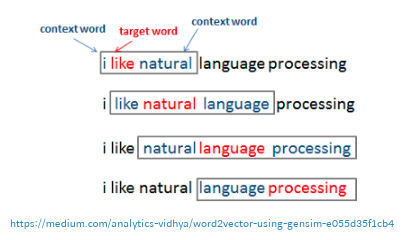

슬라이딩 윈도우를 처음부터 끝가지 마치면 다음과 같은 데이터셋을 얻을 수 있다. 

- 형식:  ((주변 단어의 셋), 중심 단어)    
- 데이터셋: ((like), I), ((I, natural), like), ((like, language), natural), ((natural, processing), language), ((language), processing)

선택된 데이터셋에서 단어 각각은 원-핫 인코딩되어 원-핫 벡터가 되고 __원-핫 벡터가 CBoW나 Skip-gram의 입력__이다. 

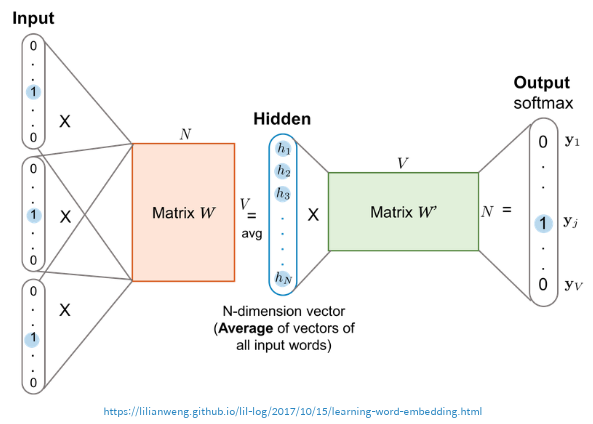
[CBoW의 시각화]

위의 그림은 원-핫 벡터로 변환된 다수의 주변 단어를 이용해 원-핫 벡터로 변환된 중심 단어를 예측할 때의 CBoW의 동작 메커니즘을 보여준다. 윈도우 크기가 m이면 2m개의 주변 단어를 이용해 1개의 중심 단어를 예측하는 과정에서 __두 가중치 행렬을 학습__ 하는 것이 목적이다. 

- 주황색 사각형: 첫 번째 가중치 행렬 $W$
- 초록색 사각형: 두 번째 가중치 행렬 $W'$

CBoW는 입력층, 은닉층, 출력층의 3개의 층으로 구성된 인공 신경망이다. Word2Vec은 은닉층이 1개이므로 __얕은 신경망(Shallow Neural Network)__ 을 학습한다.  

CBoW 신경망 구조에서 주변 단어 각각의 원-핫 벡터는 입력층에, 중심 단어의 원-핫 벡터는 출력층에 위치한다.  CBoW의 입력층과 출력층의 크기는 단어 집합의 크기인 V로 고정되어 있다. (입력과 출력이 원-핫 벡터로 표현되었기 때문) 그러나 은닉층의 크기(N)는 사용자가 정의할 수 있는 하이퍼파라미터이다. 

- 입력층 -> 은닉층

![](https://images.velog.io/images/guide333/post/9b889de3-e60f-444a-a643-b8de54ac08b5/Screenshot%20from%202021-04-13%2000-15-55.png)
[단어장의 크기: 5, 은닉층의 크기 4, 가중치 행렬의 크기: 5 x 4]

각 주변 단어의 원-핫 벡터는 첫 번째 가중치 행렬(V × N)과 곱해진다. 원-핫 벡터는 각 단어의 정수 인덱스 i에 해당하는 위치에만 1의 값을 가지기 때문에 __(원-핫 벡터 x 가중치 행렬) = (가중치 행렬의 i위치에 있는 행)__ 을 그대로 가져오는 것이다. 

마치 테이블에서 값을 그대로 룩업(lookup)해오는 것과 같다고 해 룩업 테이블(lookup table)이라고 한다. 

- 은닉층

![](https://images.velog.io/images/guide333/post/8e0824da-1f3b-4478-bf36-3cc15d7f303f/Screenshot%20from%202021-04-13%2000-21-10.png)

룩업 테이블을 거쳐 생긴 2m개의 주변 단어 벡터들은 각각 N의 크기(은닉층의 크기)를 가진다. CBoW는 이 벡터를 1) 모두 합하거나 2) 평균을 구한 값을 최종 은닉층의 결과로 한다. 따라서 최종 은닉층의 결과는 N차원의 벡터이다. 

Word2Vec에서의 은닉층은 활성화 함수가 없이 가중치 행렬과의 곱셈만 하므로 __투사층__ (projection layer)라고도 부른다.

- 은닉층 -> 출력층

![](https://images.velog.io/images/guide333/post/47c3d3f2-c50f-416a-8826-456b2d0e8ae5/Screenshot%20from%202021-04-13%2000-27-14.png)

은닉층에서 생성된 N차원의 벡터는 두번째 가중치 행렬(N × V)과 곱한 결과 V 차원의 벡터가 나온다. 출력층에서 V차원의 벡터는 활성화 함수인  소프트맥스 함수를 거쳐 모든 차원의 총합이 1이 되는 벡터로 변경된다.

- 학습     
출력층의 벡터와 중심 단어의 원-핫 벡터와의 손실(loss)을 최소화하도록 학습(backpropagation 수행)시키면서 첫 번째  가중치 행렬 $W$와 두 번쨰 가중치 행렬 $W'$를 업데이트시킨다. 학습이 다 되면 N차원의 크기를 갖는 $W$의 행이나 $W'$의 열, 혹은 $W$와 $W'$의 평균치를 임베딩 벡터로 선택한다. 


- 정리         
1.윈도우 크기에 따라 슬라이딩 윈도우를 해 데이터셋을 얻는다.          
2. 데이터셋의 단어 각각을 원-핫 벡터로 만들어 모델(CBoW나 Skip-gram)에 입력한다.       
3. 입력층 -> 은닉층: 입력인 (원-핫 벡터 x 가중치 행렬) = (가중치 행렬의 i위치에 있는 행)    
4. 은닉층: (원-핫 벡터 x 가중치 행렬)를 합하거나 평균을 통해 N차원(은닉층의 차원)의 벡터를 구한다.        
5. 은닉층 -> 출력층: (N차원의 벡터 x 두번째 가중치 행렬(N × V) = V 차원의 벡터 -> 소프트맥스 함수 통과 -> 모든 차원의 총합이 1이 되는 벡터         
6. 학습: 출력층의 벡터와 중심 단어의 원-핫 벡터와의 손실(loss)을 최소화하도록 학습 -> 가중치 행렬 $W$와 $W'$를 업데이트 -> N차원의 크기를 갖는 $W$의 행. $W'$의 열, 혹은 $W$와 $W'$의 평균치를 임베딩 벡터로 선택

## 5-6. Word2Vec (3) Skip-gram과 Negative Sampling
### Skip-gram
Skip-gram은 중심 단어로부터 주변 단어를 예측한다.

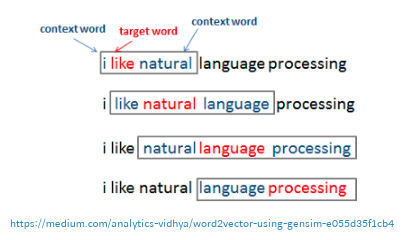

- Skip-gram의 데이터셋의 형식: (중심 단어, 주변 단어   
- 데이터셋: (i, like) (like, I), (like, natural), (natural, like), (natural, language), (language, natural), (language, processing), (processing, language)

- Skip-gram 시각화

![](https://images.velog.io/images/guide333/post/eaa3fb22-4aa3-422c-a1f5-d461ec019026/Screenshot%20from%202021-04-13%2000-40-56.png)

- CBoW와의 차이점    
  - 중심단어로부터 주변 단어를 예측한다. 
  - 은닉층에서 다수의 벡터의 덧셈과 평균을 구하는 과정이 사라짐
  
그 외에는 Skip-gram과 CBoW의 메커니즘은 동일하다. skip-gram도 학습 후 가중치 행렬 $W$의 행, 또는 $W'$의 열로부터 임베딩 벡터를 얻을 수 있다.

전반적으로 Skip-gram이 CBOW보다 성능이 좋다.

### 네거티브 샘플링(negative sampling)
대체적으로 Word2Vec를 사용한다고 하면 SGNS(Skip-Gram with Negative Sampling)을 사용한다. 앞에서 배운 Word2Vec은 연산량이 지나치게 많아 실제 사용이 어렵기 때문에 Skip-Gram 중 네거티브 샘플링(Negative Sampling) 방법을 사용한다.  

- Skip-Gram의 학습 과정    
출력층에서 소프트맥스 함수를 통과한 V 차원의 벡터와 레이블(정답)인 V차원의 주변 단어의 원-핫 벡터와의 오차를 구하고 역전파를 통해 __모든 단어에 대한 임베딩 벡터를 조정__ 한다. 단어장의 크기가 크다면 이 작업은 매우 느리고 소프트맥스 함수의 분모항이 수백만에 달한다. 


- 네거티브 샘플링    
연산량을 줄이기 위해 소프트맥스 함수(다중 클래스 분류 문제) -> 시그모이드 함수(이진 분류 문제)  

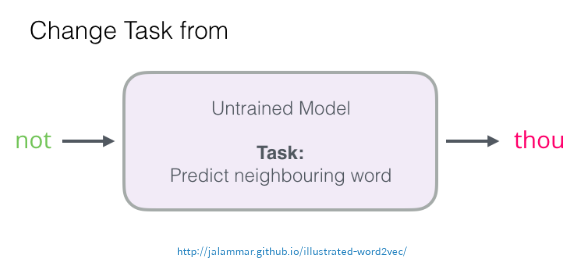

![](https://images.velog.io/images/guide333/post/88cb1af8-dc07-4ee9-8304-55046d7f2efb/Screenshot%20from%202021-04-13%2001-09-06.png)

중심 단어로부터 주변 단어 예측하는 문제(다중 분류) -> 중심 단어와 주변 단어를 입력값으로 받아 이 두 단어가 이웃 관계면 1, 아니면 0을 출력하는 문제(이진 분류)



- Skip-Gram

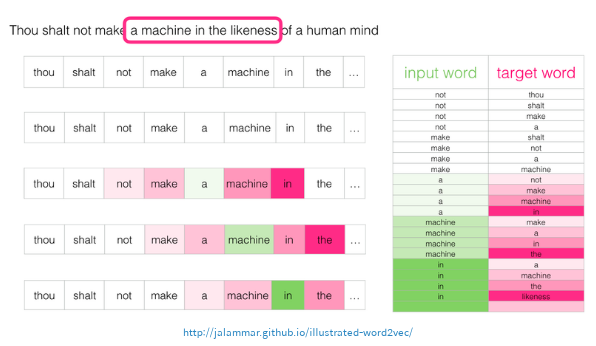

윈도우의 크기가 2일 때 슬라이딩 윈도우를 통해 만들어지는 Skip-Gram의 데이터셋. input word: 중심 단어, target word: 주변 단어

- Negative Sampling

![](https://images.velog.io/images/guide333/post/e518c12a-c649-43fc-b30e-231bf0fec874/Screenshot%20from%202021-04-13%2001-11-03.png)

슬라이딩 윈도우를 통해 만들어진 정상적인 데이터셋에는 1이라는 레이블을 달고, 실제 이웃 관계가 아닌 경우는 0으로 레이블링해준다. 

즉 단어장에 있는 아무 단어를 target word로 하는 __거짓 데이터셋__ 을 만들고 0으로 레이블링을 해준다. 거짓(negative) 데이터셋을 만들기 때문에 네거티브 샘플링이라고 부른다. 

![](https://images.velog.io/images/guide333/post/65a01048-8e64-4bc1-a92d-fdd1be12d3f6/Screenshot%20from%202021-04-13%2001-11-10.png)
[거짓 데이터셋 만드는 과정]

정상적인 데이터셋과 거짓 데이터셋을 합친 데이터셋으로 학습하면 Word2Vec은 이진 분류 문제가 된다. 중심 단어와 주변 단어를 내적하고 출력층의 시그모이드 함수를 지나게 해 1 또는 0의 레이블로부터 오차를 구해 역전파를 수행한다. 

![](https://images.velog.io/images/guide333/post/9be5a927-4762-45c3-8a52-482346ca77a1/Screenshot%20from%202021-04-13%2001-11-16.png)

이 학습 방식은 기존의 소프트맥스 함수를 사용할 때보다 연산량을 상당히 줄일 수 있다. 


단점: 훈련 데이터에 없는 단어를 넣으면 훈련된 Word2Vec 모델은 에러를 일으킨다. 

## 5-8. 임베딩 벡터의 시각화
구글이 공개한 임베딩 벡터의 시각화 오픈 소스인 __임베딩 프로젝터(embedding projector)__ 를 사용해 임베딩 벡터를 시각화한다. 어떤 임베딩 벡터들이 가까운 거리에 군집이 되어 있는지, 특정 임베딩 벡터와 유클리드 거리/코사인 유사도가 높은지 확인할 수 있다. 

### 필요한 파일 만들기
임베딩 프로젝터를 사용해 임베딩 벡터를 시각화하려면 저장된 모델이 필요하다. 저장된 모델로부터 벡터값이 저장된 파일과 메타파일을 얻어야 하기 때문이다. 그래서 'w2v'란 이름으로 모델을 저장했다. 

- 참고: [gensim scripts.word2vec2tensor](https://radimrehurek.com/gensim/models/word2vec.html)

```python
$ python -m gensim.scripts.word2vec2tensor --input ~/aiffel/word_embedding/w2v --output ~/aiffel/word_embedding/w2v
```

해당 커맨드를 수행하면 ```~/aiffel/word_embedding``` 경로에```w2v_metadata.tsv```와 ```w2v_tensor.tsv``` 파일이 생성된다. 

### 임베딩 프로젝터에 tsv 파일 업로드하기

링크 : [Embedding Projector](https://projector.tensorflow.org/)

- 좌측 상단: 데이터 업로드
- 중앙: 시각화 결과
- 우측: 거리나 유사도에 대한 파라미터를 조작

![](https://images.velog.io/images/guide333/post/6cd5e989-6e4b-4903-939d-a77da8b6f24e/Screenshot%20from%202021-04-13%2001-45-44.png)

좌측 상단의 load 버튼을 누른다. 

![](https://images.velog.io/images/guide333/post/ac582e85-6856-4fd2-bd18-c3e152d1460b/Screenshot%20from%202021-04-13%2001-45-50.png)

step1에는 각 벡터값이 저장된 tsv 파일을 업로드하고 step2에는 메타데이터(각 임베딩 벡터의 이름)의 tsv 파일을 업로드한다.

![](https://images.velog.io/images/guide333/post/a33635d9-d882-4e4c-8962-98d6a885136b/Screenshot%20from%202021-04-13%2001-45-58.png)

우측 search 버튼 또는 그래프의 포인트를 클릭해 원하는 단어를 선택하고 neighbors에 몇 개까지의 이웃을 검색할지 선택한다. distance에서 COSINE 또는 EUCLIDEAN을 통해서 거리 측정 메트릭을 코사인 유사도로 할 것인지, 유클리드 거리로 할 것인지 선택할 수 있다. 중앙에 있는 화면에 마우스를 통해서 화면을 돌려보며 임베딩 벡터들의 군집을 확인할 수 있다.


## 5-9. FastText
페이스북에서 개발한 FastText는 Word2Vec 이후에 등장한 워드 임베딩 방법으로, 메커니즘은 Word2Vec와 같지만 __문자 단위 n-gram(character-level n-gram) 표현을 학습__ 한다. Word2Vec은 단어를 가장 작은 단위로 구분하지만 FastText는 단어 내부의 __내부 단어(subwords)들을 학습__ 한다.

#### FastText의 n-gram
- n: 단어들이 얼마나 분리되는지 결정하는 하이퍼파라미터
- 예: 트라이그램(tri-gram)

단어 "partial" = 'par' + 'art' + 'rti' + 'tia' + 'ial'로 분리해 벡터로 만든다. 시작과 끝을 의미하는 <,>를 추가해 ```<pa, art, rti, tia, ial, al>```라는 6개의 내부 단어(subword) 토큰을 벡터로 만들고 기존 단어에 <, 와 >를 붙인 토큰 ```<partial>```를 벡터로 만든다. 

- n = 3인 경우,  단어 partial에 대해 임베딩되는 n-gram 토큰         
```<pa, art, rti, tia, ial, al>, <partial>```

실제 사용할 때는 n의 최솟값과 최댓값으로 범위를 설정할 수 있다. (gensim 패키지에서는 기본값으로 각각 3과 6으로 설정) 

- n = 3 ~ 6인 경우(최솟값: 3, 최댓값: 6)         
```<pa, art, rti, ita, ial, al>, <par, arti, rtia, tial, ial>, <part, ...중략... , <partial>```

내부 단어들을 벡터화한다 = 단어 각각에 대해서 Word2Vec을 수행한다

최종적으로는 벡터화된 n-gram 벡터들의 총합을 해당 단어의 벡터로 취한다.(각 원소는 벡터로 가정)

```partial = <pa + art + rti + ita + ial + al> + <par + arti + rtia + tial + ial> + <part + ...중략...  + <partial>```

### FastText의 학습 방법
FastText도 Word2Vec처럼 네거티브 샘플링을 사용하여 학습한다. "(중심 단어, 주변 단어)"의 쌍을 가지고 이 쌍이 포지티브인지 네거티브인지 예측하지만 학습 과정에서 중심 단어에 속한 문자 단위 n-gram 단어 벡터들을 모두 업데이트한다는 점이 다르다. 

### OOV와 오타에 대한 대응
FastText는 OOV와 오타에 강건하다. 단어장에 없는 단어라도 해당 단어의 n-gram이 다른 단어에 존재한다면 이로부터 벡터값을 얻기 때문이다. 

## 한국어에서의 FastText

#### (1) 음절 단위 FastText
- n = 3일때, 단어 '텐서플로우'의 트라이그램 벡터

```<텐서, 텐서플, 서플로, 플로우>, <텐서플로우>```

한국어에서 FastText가 빛을 발하는 것은 __자소 단위__ 이다. 

#### (2) 자소 단위 FastText - 효과적!
단어를 초성, 중성, 종성으로 분리한다고 하고 종성이 존재하지 않는 경우에는 \_라는 토큰을 대신 사용한다고 하자.

- n = 3일 때, 단어 '텐서플로우'는 다음과 같이 트라이그램 벡터들로 분리할 수 있다. (한국어 문법 규칙 학습 위해 추가)

```<ㅌㅔ,ㅌㅔㄴ,ㅔㄴㅅ,ㄴㅅㅓ,ㅅㅓ_, …중략… >```

한국어 어휘를 자모 수준의 배열로 만든 후, 글자 및 자모 수준의 n-gram을 추출해 각 요소에 할당된 평균 벡터를 어휘 임베딩으로 구성한다. 

[한국어를 위한 어휘 임베딩 -2-](https://brunch.co.kr/@learning/8)

>한국어: 교착어로서 구문적 복잡성을 내재하고 수많은 의도적 오탈자, 띄어쓰기 오류 등 다른 언어에서는 자주 발생하지 않는 문제들이 일어나기 때문에 영미권 연구자들이 만든 자언어처리 기계학습 모델을 그대로 적용하면 대부분 작동하지 않는다. 그래서 FastText식 접근법과 한글 자모 n-gram을 결합하여 한국어 버전의 FastText를 만들었다. 
>
> - 특징    
> 1. 정제된 텍스트가 아닌 현실 한국어 텍스트의 경우, 종성이 없을 경우 추가하는 기호가 없을 때 성능이 나아질 수 있다.   
> 2. 한국어 어휘를 글자/자모 수준으로 분리해 학습하는 것은 일부 어휘의 의미적 특성을 학습하는데 도움이 되지 않거나 방해가 되기도 한다. 복합명사의 경우는 의미적 특징을 효과적으로 잡아내지만 고유명사의 경우는 성능이 떨어질 수 있다.    

## 5-10. GloVe
- __글로브__ (Global Vectors for Word Representation, GloVe): 2014년에 미국 스탠포드 대학에서 개발한 워드 임베딩 방법론. 워드 임베딩의 두 가지 접근 방법인 __카운트 기반과 예측 기반__ 두 가지 방법을 모두 사용

- 카운트 기반 방법          
  - LSA(Latent Semantic Analysis): DTM을 차원 축소하여 밀집 표현(dense representation)으로 임베딩
  
- 예측 기반 방법    
  - Word2Vec

### 잠재 의미 분석 / LSA(Latent Semantic Analysis)
[SVD와 PCA, 그리고 잠재의미분석(LSA)](https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/06/pcasvdlsa/): 다시 읽어볼 것! 
>잠재적 의미분석은 단어와 문맥 간의 내재적 의미를 효과적으로 보존하여 문서간 유사도 측정 등 모델의 성능에 효과적이다. 입력 데이터의 노이즈 제거, 입력데이터의 sparsity를 줄일 수 있다고 한다. 그러나 새로운 문서나 단어가 추가되면 처음부터 작업을 새로 시작해야 하는 단점도 있다. 

[잠재의미분석 (LSA - Latent Semantic Analysis)](https://www.youtube.com/watch?v=GVPTGq53H5I)

LSA: __DTM__에 __특잇값 분해__를 사용해 __잠재된 의미__를 이끌어내는 방법론. 결과의 행벡터를 사용해 임베딩 벡터를 얻을 수 있다. 

그러나 LSA는 단어를 카운트해서 만든 DTM가 입력인 카운트 기반의 임베딩 방법이므로 1) 차원 축소의 특성으로 인해 새로운 단어가 추가되면 다시 DTM을 만들어 차원 축소를 새로 해야 한다. 2) 단어 벡터간 유사도를 계산할 때 Word2Vec보다 성능이 떨어진다. 

### GloVe
Word2Vec는 LSA보다 단어 벡터 간 유사도를 잘 구할 수 있지만 LSA처럼 코퍼스의 전체적인 통계 정보를 활용하지 못한다. 그래서 카운트 기반과 예측 기반을 모두 사용한 임베딩 방법인 GloVe가 제안되었다. 그러나 GloVe는 Word2Vec 정도의 성능을 보여준다.

#### 윈도우 기반 동시 등장 행렬(Window based Co-occurrence Matrix)
- Example corpus
  - I like deep learning.
  - I like NLP.
  - I enjoy flying.
  
- 동시 등장 행렬(Co-occurence Matrix): [윈도우 크기: 1]

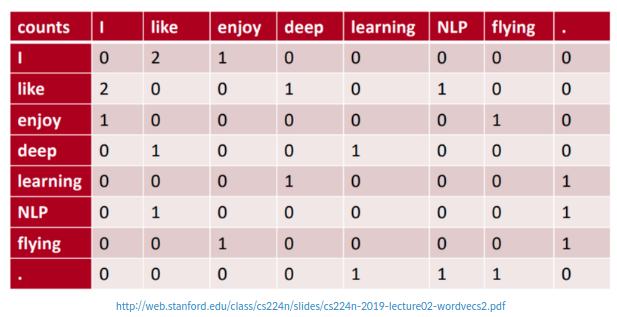


윈도우 기반 동시 등장 행렬은 행과 열을 전체 단어장(Vocabulary)의 단어들로 구성하고 어떤 __i 단어의 윈도우 크기(window size) 내에서 k 단어가 등장한 횟수를 i행 k열에 기재한 행렬__ 이다. 동시 등장 행렬은 전치(transpose)해도 동일한 행렬이 된다. 

#### 동시 등장 확률(Co-occurrence Probability)
동시 등장 확률 $P(k|i)$: 동시 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률
(i: 중심단어(center word), k: 주변 단어(context word))

![](https://images.velog.io/images/guide333/post/58d605f9-27ec-4971-810e-6793c68255c3/Screenshot%20from%202021-04-13%2010-32-03.png)
[실제 GloVe 논문에 제시된 표]

- P(solid|ice): ice가 등장했을 때 solid가 등장할 확률이 large.  
- P(solid|steam): steam이 등장했을 때 solid가 등장할 확률이 small.
- $\frac {P(solid|ice)}{P(solid|steam)}$: large

#### GloVe의 손실 함수 설계하기
- 손실함수: 동시 등장 행렬로부터 계산된 동시 등장 확률 이용. 

동시 등장 행렬을 사용하고 있기 때문에 코퍼스의 전체적인 통계 정보를 활용하는 '카운트 기반'의 방법론이자 손실 함수를 통헤 모델을 학습시키므로 '예측 기반'의 방법론이다. 

> 전체 코퍼스에서의 동시 등장 빈도의 로그값과 중심 단어 벡터와 주변 단어 벡터의 내적값(두 단어의 유사도)의 차이가 최소화도록 두 벡터의 값을 학습하는 것

[GloVe의 변수]
![](https://images.velog.io/images/guide333/post/fa6c2963-264e-4668-b2a8-732726655a11/Screenshot%20from%202021-04-13%2010-54-47.png)

[GloVe의 손실 함수]
![](https://images.velog.io/images/guide333/post/e52e208e-598c-4656-b3a6-eaecff99c5dc/Screenshot%20from%202021-04-13%2010-54-34.png)

$f(X_{ik})$: 동시 등장 행렬에서 동시 등장 빈도의 값. 이 값이 굉장히 낮은 경우에는 거의 도움이 되지 않는 정보라고 판단됨.

$f(X_{ij})$: $f(X_{ik})$의 값에 영향을 받는 __가중치 함수(weighted function)__. $f(X_{ik})$의 값이 작으면 함수의 값이 작아지고 값이 크면 함수의 값은 커진다. 그러나 $f(X_{ik})$이 큰 값일 때 지나친 가중치를 주지 않기 위해 함수의 최댓값이 1로 정해져 있다. 불용어의 동시 등장 빈도수가 높을 때 지나친 가중을 주지 않기 위해서이다. 


![](https://images.velog.io/images/guide333/post/1a3c1d87-1a15-425b-922d-9f95957af0c1/Screenshot%20from%202021-04-13%2010-32-12.png)